In [4]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.fft

import GWGen
from GWGen.WFGenerator import *

# set initial parameters
M = 1e6
m = 1e1
mu = 3.4e-17
a = 0.9
p0 = 10.0
e0 = 0.2
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 2

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
insp_kwargs = {
    "npoints": 100,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

alpha = 0.25442669409345564


# With Proca

In [5]:
ProcaInspiralKwargs = insp_kwargs.copy()
ProcaSumKwargs = sum_kwargs.copy()
withprocagen = EMRIWithProcaWaveform(inspiral_kwargs=ProcaInspiralKwargs,sum_kwargs=ProcaSumKwargs)
withproca = withprocagen(M,m,mu,a,p0,e0,Y0,T=T,qS=qS,phiS=phiS,qK=qK,phiK=phiK,dist=dist,mich=mich)

UltralightBoson instance not provide. Instantiating class...
done.
****************
Generating Trajectory for final black mass and spin 947714.430543747 and 0.7648414119859651
****************
final mass 947714.430543747
final spin 0.7648414119859651
****************
Generating Waveform
****************


/mnt/Data_Volume/Documents/software/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


# Without Proca

In [7]:
WithoutProcaInspiralKwargs = insp_kwargs.copy()
WithoutProcaSumKwargs=sum_kwargs.copy()
NewMass = withprocagen.FinalBHMass
NewSpin = withprocagen.FinalBHSpin
withoutprocagen = EMRIWaveform(inspiral_kwargs=WithoutProcaInspiralKwargs, sum_kwargs=WithoutProcaSumKwargs, use_gpu=False)
withoutproca = withoutprocagen(NewMass, m, NewSpin, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

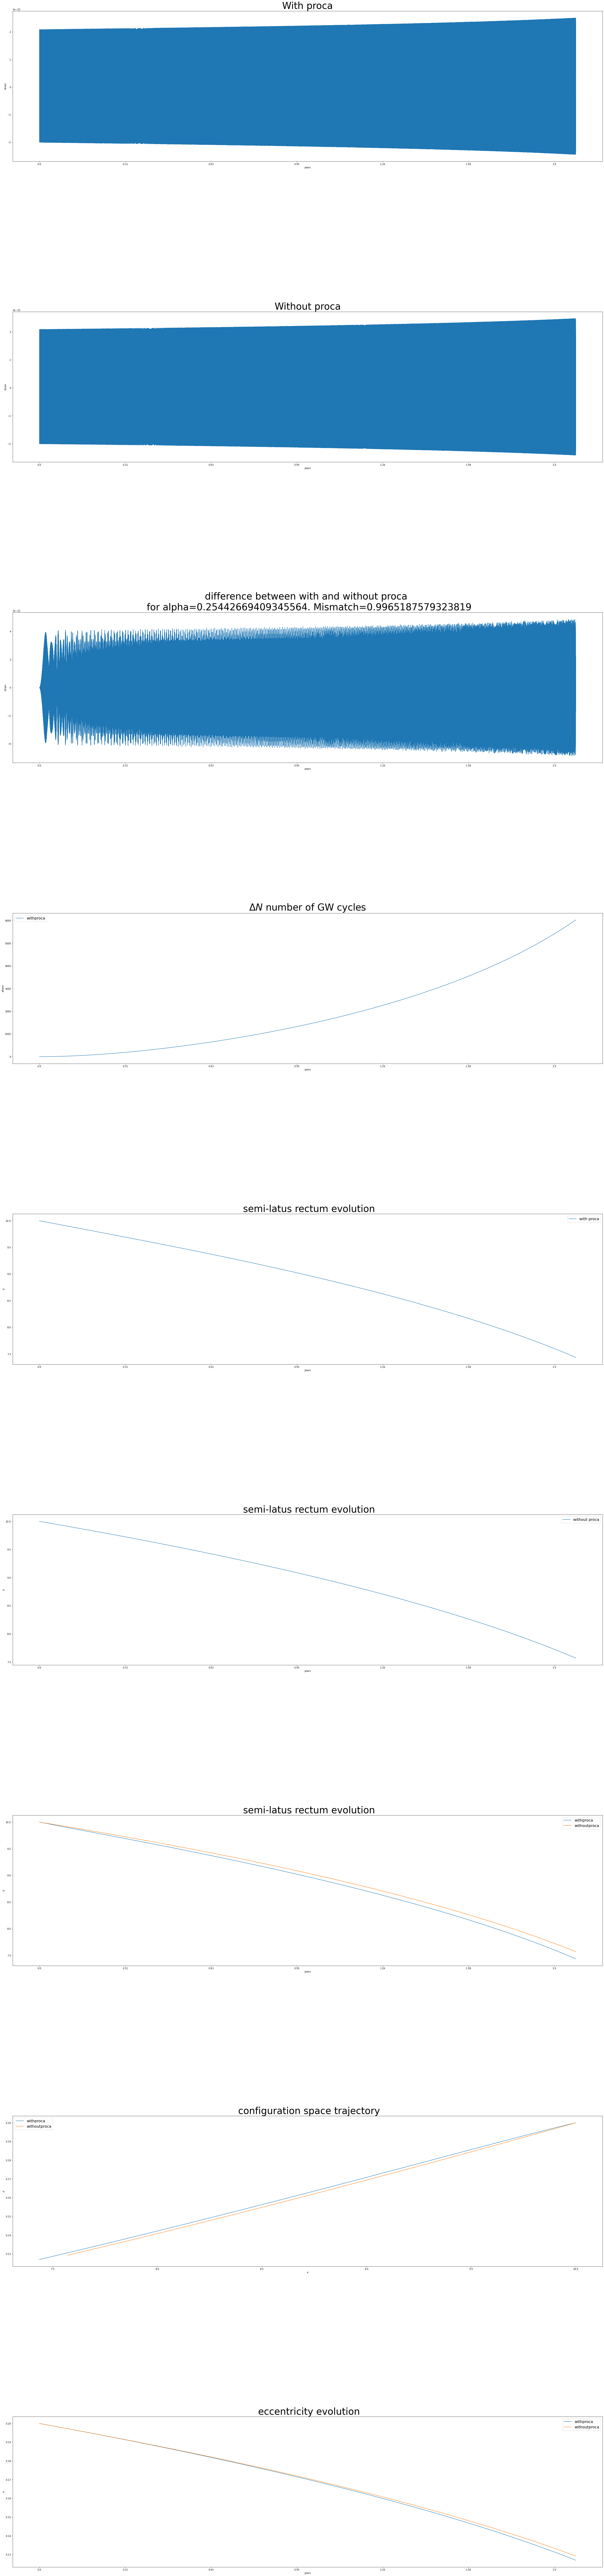

In [8]:
titlefontsize=40
legendsize=16;
if use_gpu:
    withoutproca = withoutproca.get()
    withproca=withproca.get()
mismatch = get_mismatch(withoutproca, withproca)

tp = np.arange(len(withproca)) * dt;
twp = np.arange(len(withoutproca)) * dt

fig,ax = plt.subplots(9,1, figsize=(45,200))
plt.subplots_adjust(hspace=1, wspace=0.5)
ax[0].plot(tp, withproca.real)
ax[0].set_title("With proca", fontsize=titlefontsize)
ticks = ax[0].get_xticks()[1:-1];
newlabs = np.array([int(i)/100 for i in (ticks*100/(60*60*24*365))]);
ax[0].set_xticks(ticks, newlabs);
ax[0].set_xlabel("years");
ax[0].set_ylabel("strain");

ax[1].plot(twp, withoutproca.real)
ax[1].set_title("Without proca", fontsize=titlefontsize)
ticks = ax[1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[1].set_xticks(ticks, newlabs);
ax[1].set_xlabel("years");
ax[1].set_ylabel("strain");

minwave = min([len(withproca), len(withoutproca)])
dom =tp[0:minwave-1]
ax[2].plot(dom, (withproca.real[0:minwave-1]-withoutproca.real[0:minwave-1]));
ax[2].set_title("difference between with and without proca \n for alpha={0}. Mismatch={1}".format(alphaval,mismatch), fontdict={"fontsize":9}, fontsize=titlefontsize);
ticks = ax[2].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[2].set_xticks(ticks, newlabs);
ax[2].set_xlabel("years");
ax[2].set_ylabel("strain");


minsize = min([len(tp), len(twp)])
dom = withprocagen.Trajectory["t"]
#N_orbits = phase/pi
Difference = (withprocagen.Trajectory["Phi_phi"] - withoutprocagen.Trajectory["Phi_phi"])
ax[3].plot(withprocagen.Trajectory["t"], Difference, label="withproca")
ax[3].set_title(r"$\Delta N$ number of GW cycles", fontsize=titlefontsize)
ax[3].legend(prop={'size':legendsize})
ticks = ax[3].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[3].set_xticks(ticks, newlabs);
ax[3].set_xlabel("years");
ax[3].set_ylabel("phase");


ax[4].plot(withprocagen.Trajectory["t"], withprocagen.Trajectory["p"], label="with proca")
ax[4].set_title(" semi-latus rectum evolution", fontsize=titlefontsize)
ax[4].legend(prop={'size':legendsize})
ticks = ax[4].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[4].set_xticks(ticks, newlabs);
ax[4].set_xlabel("years");
ax[4].set_ylabel("p");

ax[5].plot(withoutprocagen.Trajectory["t"], withoutprocagen.Trajectory["p"], label="without proca")
ax[5].set_title(" semi-latus rectum evolution", fontsize=titlefontsize)
ax[5].legend(prop={'size':legendsize})
ticks = ax[5].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[5].set_xticks(ticks, newlabs);
ax[5].set_xlabel("years");
ax[5].set_ylabel("p");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[6].plot(withprocagen.Trajectory["t"], withprocagen.Trajectory["p"], label="withproca")
ax[6].plot(withoutprocagen.Trajectory["t"], withoutprocagen.Trajectory["p"], label="withoutproca")
ax[6].set_title(" semi-latus rectum evolution", fontsize=titlefontsize)
ax[6].legend(prop={'size':legendsize})
ticks = ax[6].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[6].set_xticks(ticks, newlabs);
ax[6].set_xlabel("years");
ax[6].set_ylabel("p");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[7].plot(withprocagen.Trajectory["p"], withprocagen.Trajectory["e"], label="withproca")
ax[7].plot(withoutprocagen.Trajectory["p"], withoutprocagen.Trajectory["e"], label="withoutproca")
ax[7].set_title(" configuration space trajectory", fontsize=titlefontsize)
ax[7].legend(prop={'size':legendsize})
ax[7].set_xlabel("e");
ax[7].set_ylabel("p");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[8].plot(withprocagen.Trajectory["t"], withprocagen.Trajectory["e"], label="withproca")
ax[8].plot(withoutprocagen.Trajectory["t"], withoutprocagen.Trajectory["e"], label="withoutproca")
ax[8].set_title(" eccentricity evolution", fontsize=titlefontsize)
ax[8].legend(prop={'size':legendsize})
ticks = ax[8].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[8].set_xticks(ticks, newlabs);
ax[8].set_xlabel("years");
ax[8].set_ylabel("e");

plt.show()


In [ ]:
"""
wv1 = withoutproca
wv2 = withproca

aa = time.time()
tdom = np.arange(len(wv1))*dt
h1 = sp.fft.fft(wv1)
h2 = sp.fft.fft(wv2)

bb=time.time()

realfreqsinx = int(len(tdom)/2)
freq_range = np.fft.fftfreq(len(tdom), d=(tdom[1]-tdom[0]))[1:realfreqsinx]

cc=time.time()

h1 = h1[1:realfreqsinx]
h2 = h2[1:realfreqsinx]

dd=time.time()

lisasens = LisaSensitivity(freq_range)

ee=time.time()

integrand = h1*np.conjugate(h2)/lisasens

ff=time.time()

m1 = np.ma.masked_greater(freq_range,0.001).mask
m2 = np.ma.masked_less(freq_range,1).mask 
mask = np.logical_not(np.logical_and(m1,m2))

gg=time.time()

masked_freq_range = np.ma.masked_where(mask, freq_range).compressed()
masked_int = np.ma.masked_where(mask, integrand).compressed()

hh=time.time()

integral = sp.integrate.simpson(masked_int.real, x=masked_freq_range)
kk=time.time()


#interp = sp.interpolate.CubicSpline(masked_freq_range, masked_int.real)
#domain = np.arange(masked_freq_range[0], masked_freq_range[-1], 1e-8)
#rang = interp(domain)
#wv1wv2 = sp.integrate.quad(interp, masked_freq_range[0], masked_freq_range[-1], limit=10000)[0]
jj=time.time()
"""    ;

"""

domain = np.arange(masked_freq_range[0], masked_freq_range[-1], 1e-8)
ran = interp(domain)
masked = np.ma.masked_where(np.logical_not(np.logical_and(domain>0.001150, domain<1)), domain)
mdomain = np.ma.masked_where(masked.mask, domain).compressed()
mran = np.ma.masked_where(masked.mask, ran).compressed()
fig,ax = plt.subplots(1,2, figsize=(14,6))
ax[0].loglog(freq_range,h1)
ax[0].set_xlabel("Hz")
ax[1].plot(tdom[:1000], withoutproca.real[0:1000])

""";

"""aa = time.time()
timedom = np.arange(len(withproca))*dt
bb = time.time()
ret1=WaveformInnerProduct(timedom, withproca, withoutproca)
ret2=WaveformInnerProduct(timedom, withproca, withproca)
ret3=WaveformInnerProduct(timedom, withoutproca, withoutproca)
cc = time.time()
ret"""